In [11]:
import numpy as np

from scipy.interpolate import UnivariateSpline
from scipy import integrate

import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib import colors
from matplotlib.lines import Line2D
# import matplotlib.gridspec as gridspec
# from matplotlib.colors import LogNorm
# from matplotlib.ticker import LogFormatterMathtext
plt.style.use("paper.mplstyle")

In [12]:
mc = np.load("data/mcRecarray.npy")
nu_e = mc["nuE"]
ow   = mc["oneWeight"]

e_edges  = np.logspace(2,6, 41)
e_cents  = (e_edges[1:] + e_edges[:-1])/2.
e_widths = e_edges[1:] - e_edges[:-1]

cs = ["#C843C6", "#00B8C8", "#1B2984"]

In [13]:
sens_dict = {5: {300: 4.0128064663987057e-38,
  500: 5.48370548937715e-40,
  1000: 1.4585694051687332e-40,
  3000: 2.257989281466699e-40,
  5000: 4.659267194765059e-40,
  10000: 1.6186214462032005e-39},
 8: {300: 1.0620098034552686e-41,
  500: 7.351590172517271e-42,
  1000: 1.4351797655604645e-41,
  3000: 1.1385189199948143e-40,
  5000: 3.046768923308598e-40,
  10000: 1.1484056709617276e-39},
 11: {300: 8.795149005618561e-42,
  500: 3.5970244629693254e-42,
  1000: 4.659000052257703e-42,
  3000: 2.8898131574683357e-41,
  5000: 7.546021468334597e-41,
  10000: 2.8076081217893008e-40}}

In [14]:
def lalala(e, i):
    spline = splines[i]
    le = np.log10(e)
    return np.power(10, spline(le))

In [15]:
def do_it(e0, e1, i):
    return integrate.quad(lambda x: lalala(x,i), e0, e1)
#     return integrate.quad(lambda x: np.exp(x)*lalala(np.exp(x),i), np.log(e0), np.log(e1))



/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


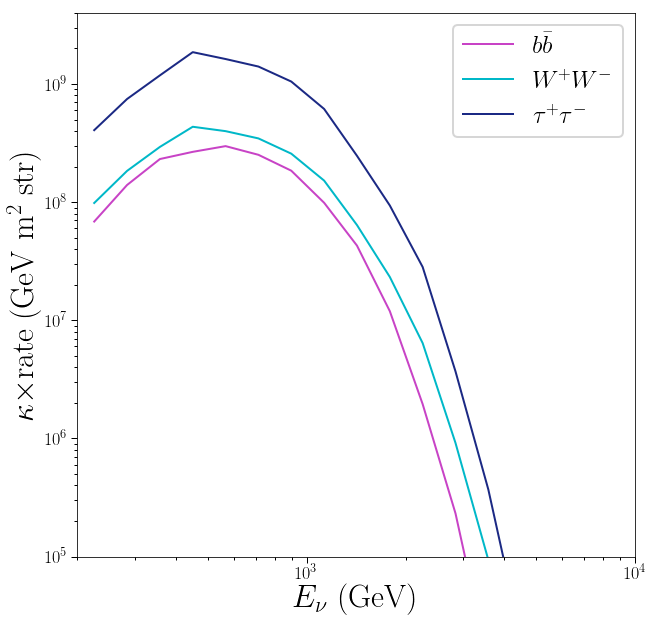

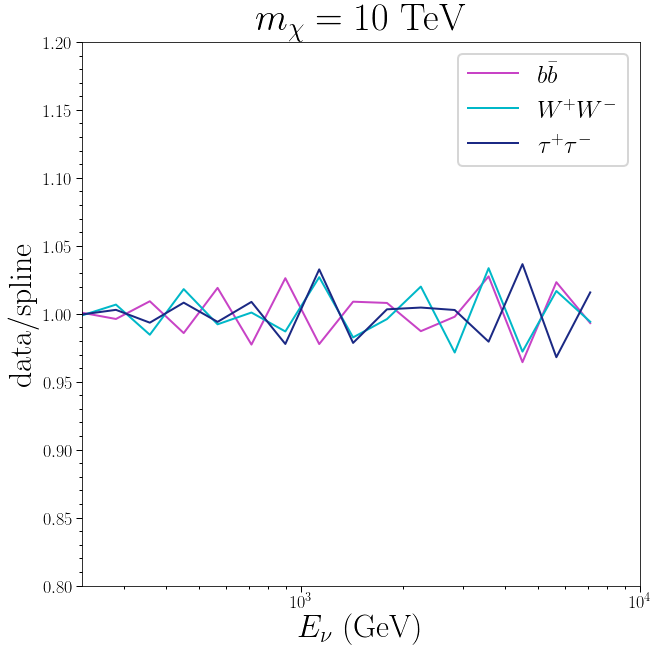

(222016296440.3789, 2337.820439658646)
(320276453987.1122, 4508.582948630843)
(1307706307731.8933, 14584.779420561843)
0.69320205615
0.709496141705
0.244914666308
0.244478775469


In [21]:
chs = [5,8,11]
ch_labs = [r"$b\bar{b}$", r"$W^{+}W^{-}$", r"$\tau^{+}\tau^{-}$"]

m  = 10000


if m==5000:
    plz = 16
elif m==10000:
    plz = 19

hists   = []
splines = []
for ch in chs:
    dn_dz = np.load("data/mc_dn_dz/ch%d_m%d_mc_dn_dz.npy" % (ch, m))
    rate_tilde = dn_dz*ow
    
    h = np.histogram(nu_e, bins=e_edges, weights=rate_tilde)
    spline = UnivariateSpline(np.log10(e_cents[3:plz+1]), np.log10(h[0])[3:plz+1], ≈)

    hists.append(h)
    splines.append(spline)
    
for i, ch in enumerate(chs):
#     plt.plot(e_cents[3:plz], lalala(e_cents[3:plz], i), "--", lw=5, color=cs[i], alpha=0.5)
    plt.plot(e_cents[3:plz], hists[i][0][3:plz], label=ch_labs[i], color=cs[i])

    plt.xlim(200,m)
    plt.ylim(1e5, 4e9)
    
#     plt.title(r"$m_{\chi}=10$ TeV")
    plt.ylabel(r"$\kappa\times$rate (GeV m$^{2}$ str)")
    plt.xlabel(r"$E_{\nu}$ (GeV)")
    
    plt.loglog()
    plt.legend()
plt.show()   

for i, ch in enumerate(chs):
    plt.plot(e_cents[3:plz], hists[i][0][3:plz]/lalala(e_cents[3:plz], i), label=ch_labs[i], color=cs[i])

    plt.xlim(225.35743732, m)
    plt.ylim(0.8,1.2)
    
    plt.title(r"$m_{\chi}=10$ TeV")
    plt.ylabel(r"data/spline") 
    plt.xlabel(r"$E_{\nu}$ (GeV)")
    
    plt.semilogx()
    plt.legend()
plt.show()

int_rate = []

for j in range(3):
    i = do_it(225.35743732, e_cents[plz], j)
    print(i)
    assert(i[1]/i[0]<1e-7)
    int_rate.append(i)
    
print(int_rate[0][0]/int_rate[1][0])
print((sens_dict[5][m]/sens_dict[8][m])**-1)
print(int_rate[1][0]/int_rate[2][0])
print((sens_dict[8][m]/sens_dict[11][m])**-1)

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


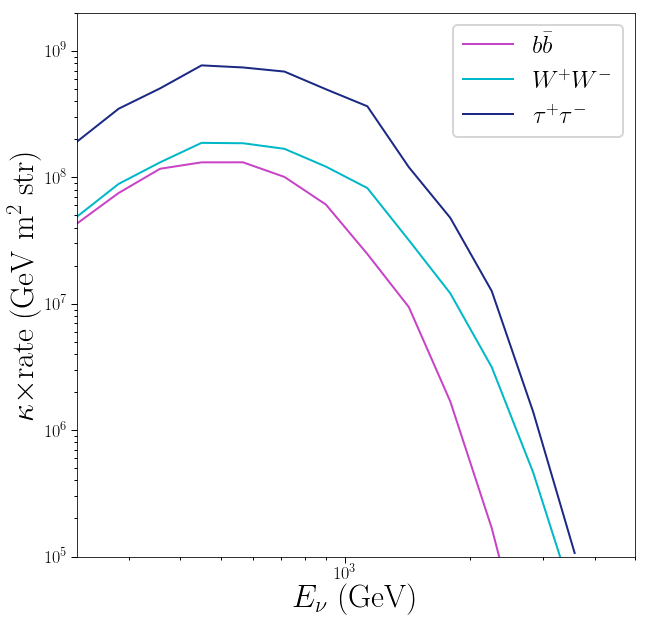

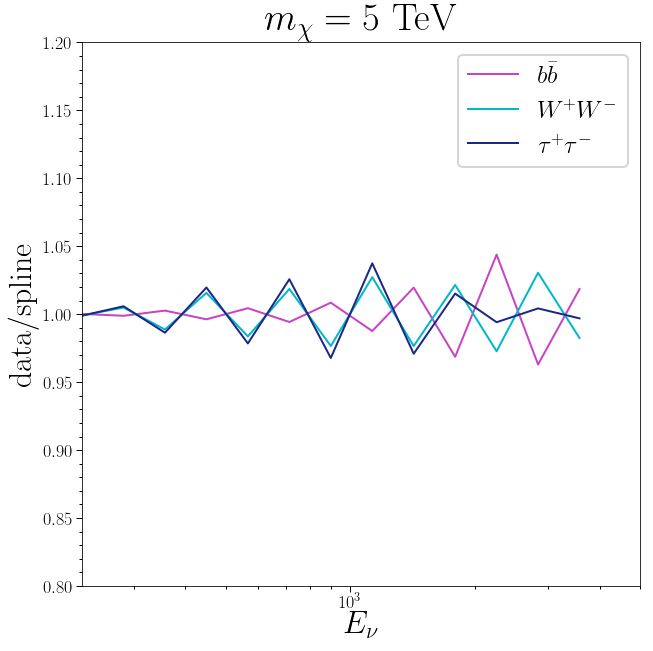

(86090355038.02603, 849.5915450064022)
(153366434949.86453, 989.8564927536704)
(622689085911.4604, 7939.690407647187)
0.561337655571
0.653915904787
0.24629696974
0.247672917057


In [19]:
chs = [5,8,11]
ch_labs = [r"$b\bar{b}$", r"$W^{+}W^{-}$", r"$\tau^{+}\tau^{-}$"]

m  = 5000


if m==5000:
    plz = 16
elif m==10000:
    plz = 19

hists   = []
splines = []
for ch in chs:
    dn_dz = np.load("data/mc_dn_dz/ch%d_m%d_mc_dn_dz.npy" % (ch, m))
    rate_tilde = dn_dz*ow
    
    h = np.histogram(nu_e, bins=e_edges, weights=rate_tilde)
    spline = UnivariateSpline(np.log10(e_cents[3:plz+1]), np.log10(h[0])[3:plz+1], s=1e-3)

    hists.append(h)
    splines.append(spline)
    
for i, ch in enumerate(chs):
#     plt.plot(e_cents[3:plz], lalala(e_cents[3:plz], i), "--", lw=5, color=cs[i], alpha=0.5)
    plt.plot(e_cents[3:plz], hists[i][0][3:plz], label=ch_labs[i], color=cs[i])

    plt.xlim(225.35743732, m)
    plt.ylim(1e5, 2e9)

    
#     plt.title(r"$m_{\chi}=5$ TeV")
    plt.ylabel(r"$\kappa\times$rate (GeV m$^{2}$ str)")
    plt.xlabel(r"$E_{\nu}$ (GeV)")
    
    plt.loglog()
    plt.legend()
plt.show()   

for i, ch in enumerate(chs):
    plt.plot(e_cents[3:plz], hists[i][0][3:plz]/lalala(e_cents[3:plz], i), label=ch_labs[i], color=cs[i])

    plt.xlim(225.35743732, m)
    plt.ylim(0.8,1.2)
    
    plt.title(r"$m_{\chi}=5$ TeV")
    plt.ylabel(r"data/spline")
    plt.xlabel(r"$E_{\nu}$")
    
    plt.semilogx()
    
    plt.legend()
plt.show()

int_rate = []

for j in range(3):
    i = do_it(225.35743732, m, j)
    print(i)
    assert(i[1]/i[0]<1e-7)
    int_rate.append(i)
    
print(int_rate[0][0]/int_rate[1][0])
print((sens_dict[5][m]/sens_dict[8][m])**-1)
print(int_rate[1][0]/int_rate[2][0])
print((sens_dict[8][m]/sens_dict[11][m])**-1)

In [ ]:
chs = [5,8,11]
ch_labs = [r"$b\bar{b}$", r"$W^{+}W^{-}$", r"$\tau^{+}\tau^{-}$"]

m  = 5000


if m==5000:
    plz = 16
elif m==10000:
    plz = 19

hists   = []
splines = []
for ch in chs:
    dn_dz = np.load("data/mc_dn_dz/ch%d_m%d_mc_dn_dz.npy" % (ch, m))
    rate_tilde = dn_dz*ow
    
    h = np.histogram(nu_e, bins=e_edges, weights=rate_tilde)
    spline = UnivariateSpline(np.log10(e_cents[3:plz+1]), np.log10(h[0])[3:plz+1], s=1e-3)

    hists.append(h)
    splines.append(spline)
    
for i, ch in enumerate(chs):
    plt.plot(e_cents[3:plz], lalala(e_cents[3:plz], i), "--", lw=5, color=cs[i], alpha=0.5)
    plt.plot(e_cents[3:plz], hists[i][0][3:plz], label=ch_labs[i], color=cs[i])

    plt.xlim(225.35743732, m)
    
    plt.title(r"$m_{\chi}=5$ TeV")
    plt.ylabel(r"$\kappa\times$rate (GeV m$^{2}$ str)")
    plt.xlabel(r"$E_{\nu}$")
    
    plt.loglog()
    plt.legend()
plt.show()   

for i, ch in enumerate(chs):
    plt.plot(e_cents[3:plz], hists[i][0][3:plz]/lalala(e_cents[3:plz], i), label=ch_labs[i], color=cs[i])

    plt.xlim(225.35743732, m)
    plt.ylim(0.8,1.2)
    
    plt.title(r"$m_{\chi}=5$ TeV")
    plt.ylabel(r"data/spline")
    plt.xlabel(r"$E_{\nu}$")
    
    plt.semilogx()
    
    plt.legend()
plt.show()

int_rate = []

for j in range(3):
    i = do_it(225.35743732, m, j)
    print(i)
    assert(i[1]/i[0]<1e-7)
    int_rate.append(i)
    
print(int_rate[0][0]/int_rate[1][0])
print((sens_dict[5][m]/sens_dict[8][m])**-1)
print(int_rate[1][0]/int_rate[2][0])
print((sens_dict[8][m]/sens_dict[11][m])**-1)

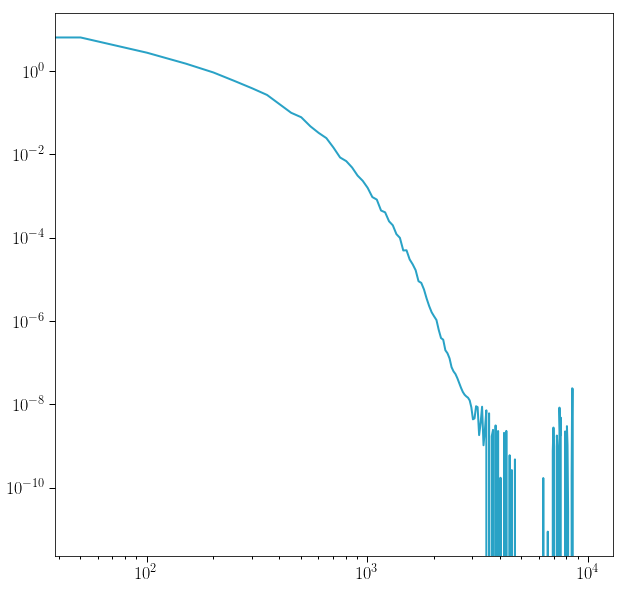

In [8]:
flux = np.load("data/qr_dn_dz/ch5_m10000_dn_dz.npy")[0][0]
plt.plot(np.linspace(0,1,len(flux))*10000, flux)
plt.loglog()
plt.show()

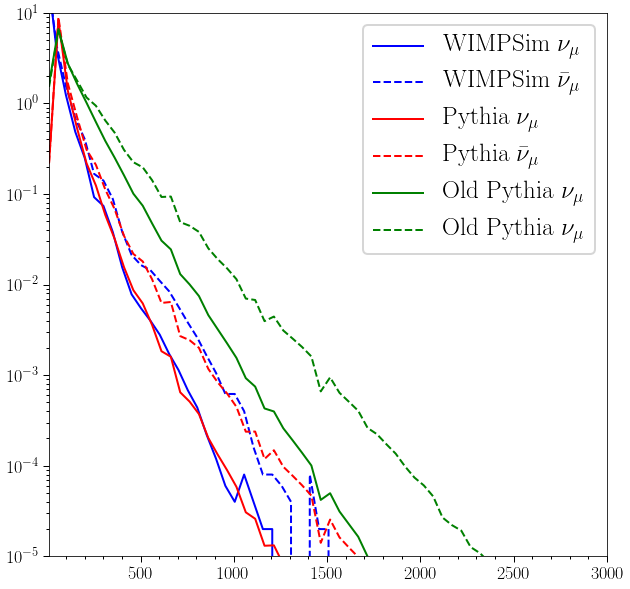

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in divide


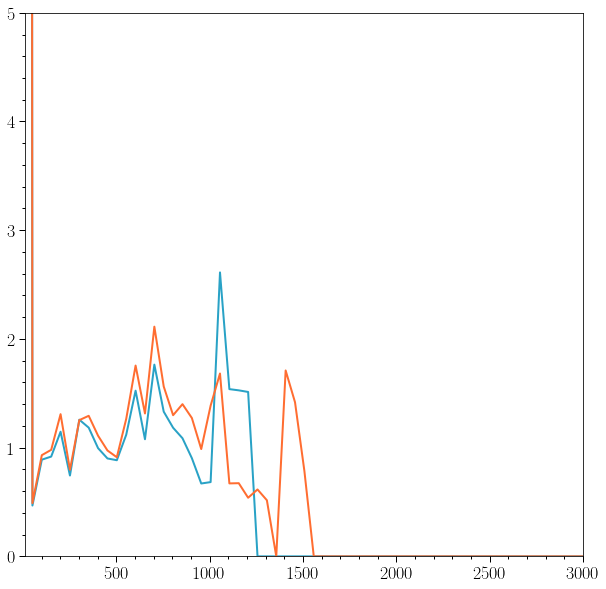

In [7]:
# s = "/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch11-sun-sum.dat"
ws_nu_sunctr    = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch5-sun-sum.dat")[2]
ws_nubar_sunctr = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch5-sun-sum.dat")[3]
ws_nu_sunsfc    = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch5-sun-sum.dat")[8]
ws_nubar_sunsfc = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch5-sun-sum.dat")[9]
_ = np.load("data/ch5_m10000_dn_dz_det.npy")
qr_nu_sunsfc    = _[0]
qr_nubar_sunsfc = _[1]
_ = np.load("data/ch5_m10000_dn_dz_det_old.npy")
qr_nu_sunsfc_old    = _[0]
qr_nubar_sunsfc_old = _[1]

qr_es = np.linspace(10, 10000, 200)
ws_es = np.linspace(0,10000, 200)

# plt.plot(es, nu_sunctr)
# plt.plot(es, nubar_sunctr)
plt.plot(ws_es, ws_nu_sunsfc, color="b", label=r"WIMPSim $\nu_{\mu}$")
plt.plot(ws_es, ws_nubar_sunsfc, color="b", linestyle="--", label=r"WIMPSim $\bar{\nu}_{\mu}$")
plt.plot(qr_es, qr_nu_sunsfc, color="r", label=r"Pythia $\nu_{\mu}$")
plt.plot(qr_es, qr_nubar_sunsfc, color="r", linestyle="--", label=r"Pythia $\bar{\nu}_{\mu}$")
plt.plot(qr_es, qr_nu_sunsfc_old, color="g", label=r"Old Pythia $\nu_{\mu}$")
plt.plot(qr_es, qr_nubar_sunsfc_old, color="g", linestyle="--", label=r"Old Pythia $\nu_{\mu}$")
plt.xlim(10,3000)
plt.ylim(1e-5, 10)
plt.semilogy()
plt.legend()
plt.show()

plt.plot(ws_es, ws_nu_sunsfc/qr_nu_sunsfc)
plt.plot(ws_es, ws_nubar_sunsfc/qr_nubar_sunsfc)
plt.xlim(10,3000)
plt.ylim(0, 5)
plt.show()

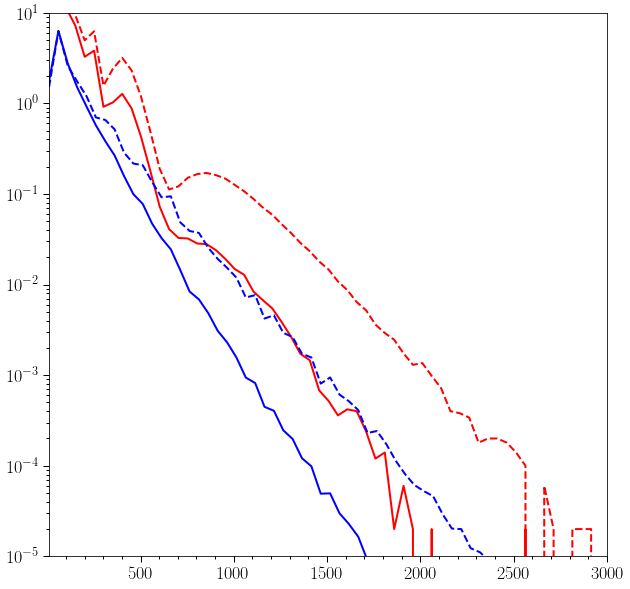

In [17]:
# plt.plot(es, nu_sunctr)
# plt.plot(es, nubar_sunctr)
plt.plot(ws_es, ws_nu_sunsfc, color="r")
plt.plot(ws_es, ws_nubar_sunsfc, color="r", linestyle="--")
plt.plot(qr_es, qr_nu_sunsfc, color="b")
plt.plot(qr_es, qr_nubar_sunsfc, color="b", linestyle="--")
plt.xlim(10,3000)
plt.ylim(1e-5, 10)
plt.semilogy()
plt.show()

plt.plot(ws_es, ws_nu_sunsfc/qr_nu_sunsfc)
plt.plot(ws_es, ws_nubar_sunsfc/qr_nubar_sunsfc)
plt.xlim(10,3000)
plt.ylim(0, 50)
plt.show()

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


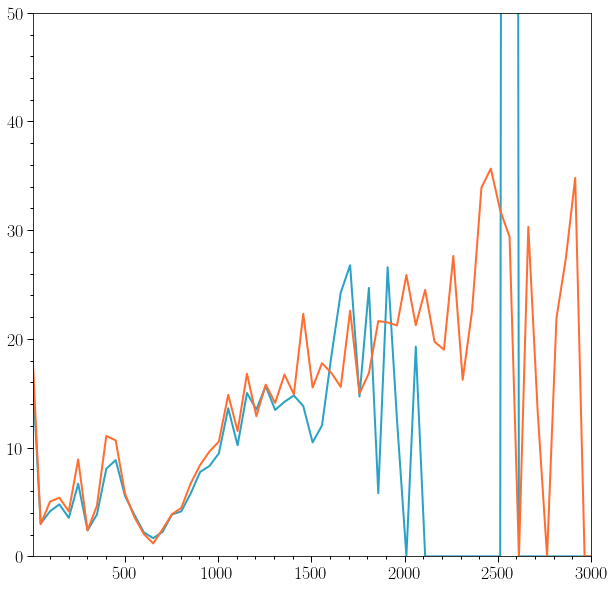

In [20]:
plt.plot(ws_es, ws_nu_sunsfc/qr_nu_sunsfc)
plt.plot(ws_es, ws_nubar_sunsfc/qr_nubar_sunsfc)
plt.xlim(10,3000)
plt.ylim(0, 50)
plt.show()

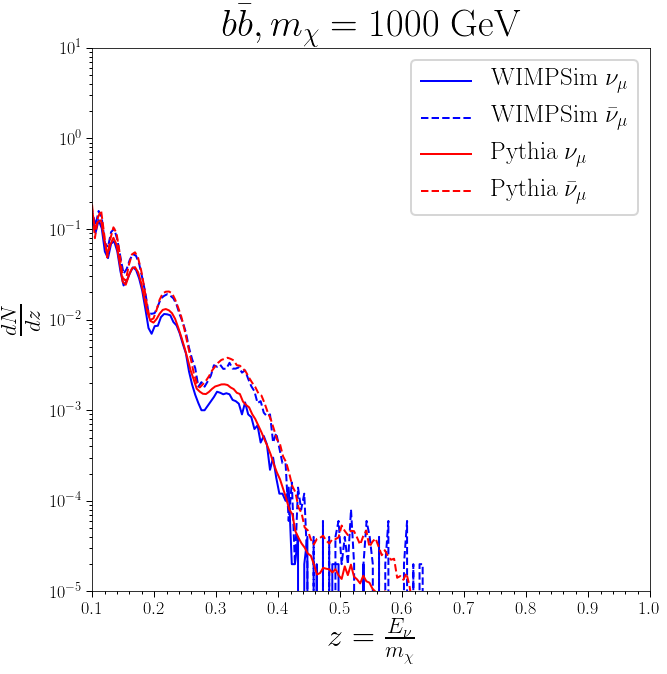

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in divide


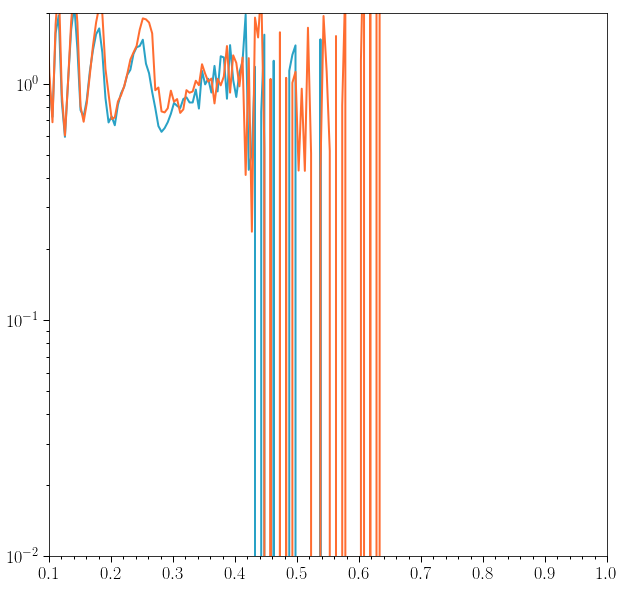

In [28]:
ws_nu_sunctr    = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m1000-ch5-sun-sum.dat")[2]
ws_nubar_sunctr = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m1000-ch5-sun-sum.dat")[3]
ws_nu_sunsfc    = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m1000-ch5-sun-sum.dat")[8] +\
                  np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m1000-ch5-sun-sum.dat")[20]
ws_nubar_sunsfc = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m1000-ch5-sun-sum.dat")[9] +\
                  np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m1000-ch5-sun-sum.dat")[21]
_ = np.load("data/ch5_m1000_dn_dz_sunsfc.npy")
qr_nu_sunsfc    = _[0]
qr_nubar_sunsfc = _[1]

qr_zs = np.linspace(0.01, 1, 200)
ws_zs = np.linspace(0,1, 200)

# plt.plot(es, nu_sunctr)
# plt.plot(es, nubar_sunctr)
plt.plot(ws_zs, ws_nu_sunsfc, color="b", label=r"WIMPSim $\nu_{\mu}$")
plt.plot(ws_zs, ws_nubar_sunsfc, color="b", linestyle="--", label=r"WIMPSim $\bar{\nu}_{\mu}$")
plt.plot(qr_zs, qr_nu_sunsfc, color="r", label=r"Pythia $\nu_{\mu}$")
plt.plot(qr_zs, qr_nubar_sunsfc, color="r", linestyle="--", label=r"Pythia $\bar{\nu}_{\mu}$")
plt.xlim(0.1,1)
plt.ylim(1e-5, 10)

plt.title(r"$b\bar{b},m_{\chi}=1000$ GeV")
plt.xlabel(r"$z=\frac{E_{\nu}}{m_{\chi}}$")
plt.ylabel(r"$\frac{dN}{dz}$")

plt.legend()

plt.semilogy()
plt.show()

plt.plot(ws_zs, ws_nu_sunsfc/qr_nu_sunsfc)
plt.plot(ws_zs, ws_nubar_sunsfc/qr_nubar_sunsfc)
plt.xlim(0.1,1)
plt.ylim(0.01, 2)

plt.semilogy()

plt.show()



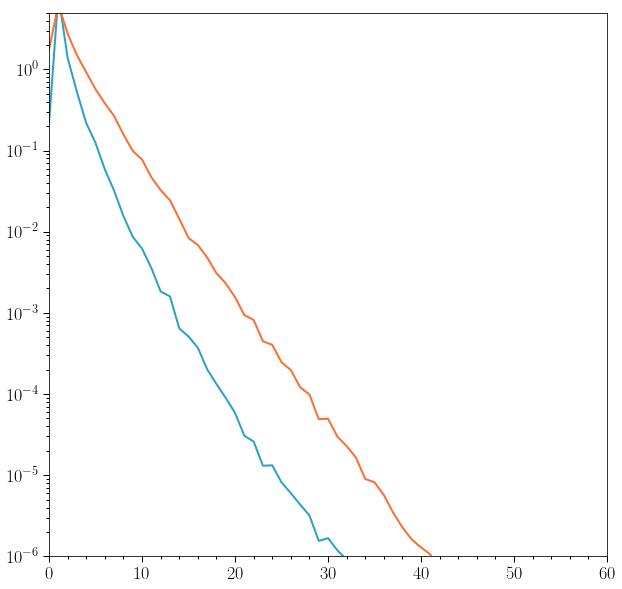

In [42]:
newnu = np.load("plz.npy")[0]
newnubar = np.load("plz.npy")[1]
oldnu = np.load("data/qr_dn_dz/ch5_m10000_dn_dz.npy")[0][0]
oldnubar = np.load("data/qr_dn_dz/ch5_m10000_dn_dz.npy")[1][0]

plt.plot(newnu)
# plt.plot(newnubar)
plt.plot(oldnu)
# plt.plot(oldnubar)
plt.semilogy()
plt.ylim(1e-6,5)
plt.xlim(0, 60)
plt.show()

In [33]:
np.load("data/qr_dn_dz/ch5_m10000_dn_dz.npy")[0][0].shape

(200,)

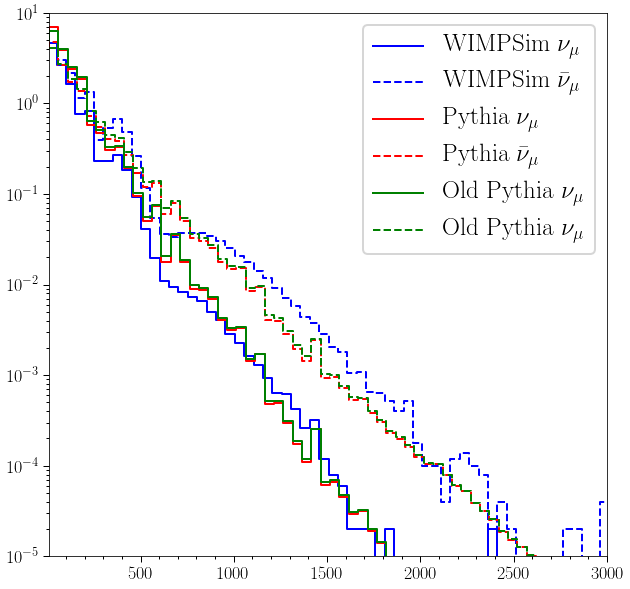

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in divide
/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in divide


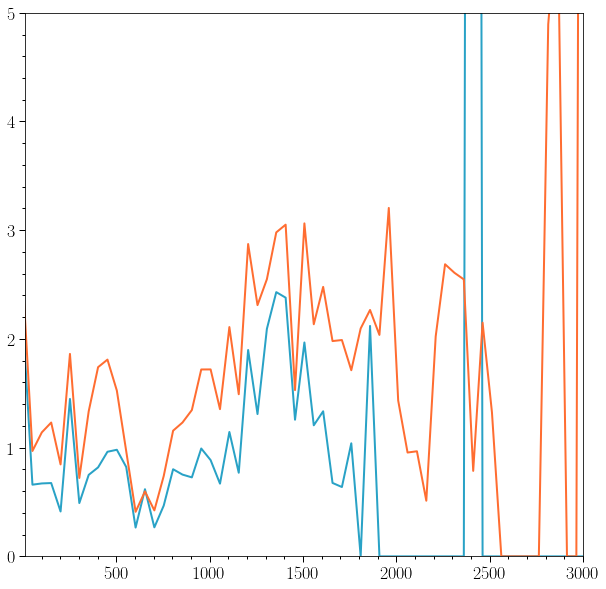

In [9]:
# s = "/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch11-sun-sum.dat"
ws_nu_sunctr    = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch8-sun-sum.dat")[2]
ws_nubar_sunctr = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch8-sun-sum.dat")[3]
ws_nu_sunsfc    = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch8-sun-sum.dat")[8]
ws_nubar_sunsfc = np.genfromtxt("/data/user/qliu/DM/wimpsim-4.1.2/scr/ann_run/dat-wa/wa-m10000-ch8-sun-sum.dat")[9]
_ = np.load("data/ch8_m10000_dn_dz_sunsfc.npy")
qr_nu_sunsfc    = _[0]
qr_nubar_sunsfc = _[1]
_ = np.load("data/ch8_m10000_dn_dz_sunsfc_old.npy")
qr_nu_sunsfc_old    = _[0]
qr_nubar_sunsfc_old = _[1]

qr_es = np.linspace(10, 10000, 200)
ws_es = np.linspace(0,10000, 200)

# plt.plot(es, nu_sunctr)
# plt.plot(es, nubar_sunctr)
plt.step(ws_es, ws_nu_sunsfc, color="b", label=r"WIMPSim $\nu_{\mu}$")
plt.step(ws_es, ws_nubar_sunsfc, color="b", linestyle="--", label=r"WIMPSim $\bar{\nu}_{\mu}$")
plt.step(qr_es, qr_nu_sunsfc, color="r", label=r"Pythia $\nu_{\mu}$")
plt.step(qr_es, qr_nubar_sunsfc, color="r", linestyle="--", label=r"Pythia $\bar{\nu}_{\mu}$")
plt.step(qr_es, qr_nu_sunsfc_old, color="g", label=r"Old Pythia $\nu_{\mu}$")
plt.step(qr_es, qr_nubar_sunsfc_old, color="g", linestyle="--", label=r"Old Pythia $\nu_{\mu}$")
plt.xlim(10,3000)
plt.ylim(1e-5, 10)
plt.semilogy()
plt.legend()
plt.show()

plt.plot(ws_es, ws_nu_sunsfc/qr_nu_sunsfc)
plt.plot(ws_es, ws_nubar_sunsfc/qr_nubar_sunsfc)
plt.xlim(10,3000)
plt.ylim(0, 5)
plt.show()